In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [40]:
import matplotlib as mpl
mpl.style.use('default') #seaborn-white')
mpl.style.available

['dark_background',
 'seaborn-pastel',
 'ggplot',
 'seaborn-poster',
 'tableau-colorblind10',
 'bmh',
 'seaborn-whitegrid',
 'seaborn-muted',
 'classic',
 '_classic_test',
 'seaborn-darkgrid',
 'seaborn-talk',
 'Solarize_Light2',
 'fast',
 'seaborn-deep',
 'seaborn-paper',
 'grayscale',
 'seaborn-notebook',
 'seaborn-dark-palette',
 'fivethirtyeight',
 'seaborn',
 'seaborn-dark',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-ticks',
 'seaborn-white']

In [41]:
def translate_names(ds):
    ds_names = {
        "viscode_t4_limited" : "VC",
        "viscode_t4_limited_art" : "ART",
        "gen" : "GEN",
        "astnn_t4" : "ASTNN"
    }
    
    if "dataset" in ds.columns:
        ds["dataset"].replace(ds_names, inplace=True)
    return ds
        
def full_names(ls):
    fulls = {"VC": "bcb non-clones",
             "ART": "generated non-clones",
             "GEN": "generalization",
             "ds_no_duplicates": "no duplicates",
             "ds_with_duplicates": "with duplicates",
             
             "bc": "neural network",
             "knn": "kNN",
             "svm": "SVM",
             "nn": "NN",
             "astnn": "ASTNN",
             
             "st": "simple text",
             "sh": "color highlighting",
             "kp": "geometric keywords",
             "as": "condensed AST"
                 }
    if isinstance(ls, str):
        return fulls[ls] if ls in fulls else ls
    else:
        return [fulls[x] if x in fulls else x for x in ls]

In [42]:
def mean_of_runs(ds):
    ds_mean = ds.groupby(["algorithm", "dataset", "visualization"]).mean()

    reduced_columns = list(ds_mean.columns.values)
    reduced_columns.remove("run")
    return ds_mean[reduced_columns].reset_index()

mean_of_runs(pd.read_csv("data_cc_oj.csv")).to_csv("data_cc_oj_m.csv")
mean_of_runs(pd.read_csv("large_multi_experiment.csv")).to_csv("large_multi_experiment_m.csv")
mean_of_runs(pd.read_csv("compar_to_astnn.csv")).to_csv("compar_to_astnn_m.csv")


In [43]:
def apply_hatching(ax, g):
    bars = ax.patches
    hatches = np.repeat(["\\\\\\\\\\", "//",  "....","xxxxx"], len(g))
    for bar, hatch in zip(bars, hatches):
        bar.set_hatch(hatch)

In [44]:
exp1_results = translate_names(mean_of_runs(pd.read_csv("data_cc_oj.csv")))
print(exp1_results.head())
print(exp1_results.columns)
exp1_results = exp1_results[exp1_results["visualization"] == "st"]
exp1_results.drop("dataset", axis=1, inplace=True)
print(len(exp1_results.index))


  algorithm dataset visualization  accuracy  precision    recall        f1
0        cc      oj            sh  0.799199   0.803522  0.799199  0.799238
1        cc      oj            st  0.863654   0.866604  0.863654  0.863464
Index(['algorithm', 'dataset', 'visualization', 'accuracy', 'precision',
       'recall', 'f1'],
      dtype='object')
1


               accuracy        f1  precision    recall
visualization                                         
st             0.863654  0.863464   0.866604  0.863654


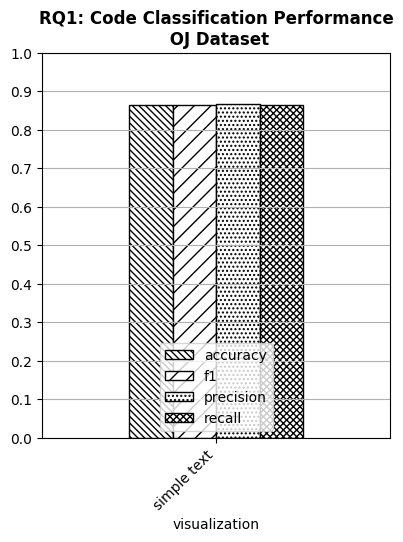

In [45]:
for alg in exp1_results["algorithm"].unique():
    ss = exp1_results[exp1_results["algorithm"] == alg]
    er1 = ss[ss.columns.difference(["algorithm"])]
    g = er1.groupby(["visualization" ]).mean()
    print(g)
    g.plot.bar(figsize=(4.5,5), facecolor='white', edgecolor='black')
    plt.title("RQ1: Code Classification Performance\n OJ Dataset", fontweight="bold")
    ax = plt.gca()
    apply_hatching(ax, g)
    plt.legend(loc='lower center')
    ax.yaxis.grid(True)
    ax.set_xticklabels(full_names(g.index), rotation=45, ha="right")
    ax.set_yticks([x*0.1 for x in range(11)])
    plt.show()

In [46]:
exp2_results = translate_names(mean_of_runs(pd.read_csv("large_multi_experiment.csv")))
exp2_results

algorithm             dataset visualization  accuracy  precision    recall  \
0        knn    ds_no_duplicates            as  0.940678   0.973094  0.907950   
1        knn    ds_no_duplicates            kp  0.917373   0.909836  0.928870   
2        knn    ds_no_duplicates            sh  0.923729   0.939394  0.907950   
3        knn    ds_no_duplicates            st  0.936441   0.948498  0.924686   
4        knn  ds_with_duplicates            as  0.926335   0.957143  0.905405   
5        knn  ds_with_duplicates            kp  0.924494   0.929293  0.932432   
6        knn  ds_with_duplicates            sh  0.950276   0.975265  0.932432   
7        knn  ds_with_duplicates            st  0.950276   0.955932  0.952703   
8      knn_r    ds_no_duplicates            as  0.940678   0.973094  0.907950   
9      knn_r    ds_no_duplicates            kp  0.917373   0.909836  0.928870   
10     knn_r    ds_no_duplicates            sh  0.923729   0.939394  0.907950   
11     knn_r    ds_no_duplicates            st  0.936441   0.948498  0.924686   
12     knn_r  ds_with_duplicates            as  0.926335   0.957143  0.905405   
13     knn_r  ds_with_duplicates            kp  0.924494   0.929293  0.932432   
14     knn_r  ds_with_duplicates            sh  0.950276   0.975265  0.932432   
15     knn_r  ds_with_duplicates            st  0.950276   0.955932  0.952703   
16        nn    ds_no_duplicates            as  0.920904   0.940646  0.900976   
17        nn    ds_no_duplicates            kp  0.881356   0.862777  0.910739   
18        nn    ds_no_duplicates            sh  0.917373   0.949190  0.884240   
19        nn    ds_no_duplicates            st  0.903955   0.921625  0.885635   
20        nn  ds_with_duplicates            as  0.940454   0.952039  0.938063   
21        nn  ds_with_duplicates            kp  0.907305   0.894130  0.941441   
22        nn  ds_with_duplicates            sh  0.939840   0.960407  0.927928   
23        nn  ds_with_duplicates            st  0.932474   0.935279  0.941441   
24      nn_r    ds_no_duplicates            as  0.917373   0.936661  0.898187   
25      nn_r    ds_no_duplicates            kp  0.888418   0.877290  0.906555   
26      nn_r    ds_no_duplicates            sh  0.917373   0.950595  0.882845   
27      nn_r    ds_no_duplicates            st  0.902542   0.918958  0.885635   
28      nn_r  ds_with_duplicates            as  0.934316   0.938292  0.941441   
29      nn_r  ds_with_duplicates            kp  0.907919   0.899396  0.935811   
30      nn_r  ds_with_duplicates            sh  0.938613   0.957171  0.929054   
31      nn_r  ds_with_duplicates            st  0.936157   0.943475  0.939189   
32       svm    ds_no_duplicates            as  0.841102   0.812977  0.891213   
33       svm    ds_no_duplicates            kp  0.718220   0.670968  0.870293   
34       svm    ds_no_duplicates            sh  0.819915   0.815574  0.832636   
35       svm    ds_no_duplicates            st  0.754237   0.699029  0.903766   
36       svm  ds_with_duplicates            as  0.860037   0.837423  0.922297   
37       svm  ds_with_duplicates            kp  0.734807   0.689055  0.935811   
38       svm  ds_with_duplicates            sh  0.830571   0.800000  0.918919   
39       svm  ds_with_duplicates            st  0.718232   0.662870  0.983108   
40     svm_r    ds_no_duplicates            as  0.841102   0.812977  0.891213   
41     svm_r    ds_no_duplicates            kp  0.718220   0.670968  0.870293   
42     svm_r    ds_no_duplicates            sh  0.819915   0.815574  0.832636   
43     svm_r    ds_no_duplicates            st  0.754237   0.699029  0.903766   
44     svm_r  ds_with_duplicates            as  0.860037   0.837423  0.922297   
45     svm_r  ds_with_duplicates            kp  0.734807   0.689055  0.935811   
46     svm_r  ds_with_duplicates            sh  0.830571   0.800000  0.918919   
47     svm_r  ds_with_duplicates            st  0.718232   0.662870  0.983108   

          f1  
0   0.939394  
1  

In [47]:
exp2_results = translate_names(mean_of_runs(pd.read_csv("large_multi_experiment.csv")))
exp2_results = exp2_results[(exp2_results["algorithm"] == "nn")]# & (exp2_results["dataset"] == "ds_with_duplicates")] 
print(exp2_results.head())
print(exp2_results.columns)
#exp2_results.drop("dataset", axis=1, inplace=True)
print(len(exp2_results.index))


   algorithm             dataset visualization  accuracy  precision    recall  \
16        nn    ds_no_duplicates            as  0.920904   0.940646  0.900976   
17        nn    ds_no_duplicates            kp  0.881356   0.862777  0.910739   
18        nn    ds_no_duplicates            sh  0.917373   0.949190  0.884240   
19        nn    ds_no_duplicates            st  0.903955   0.921625  0.885635   
20        nn  ds_with_duplicates            as  0.940454   0.952039  0.938063   

          f1  
16  0.920241  
17  0.886049  
18  0.915527  
19  0.903271  
20  0.944980  
Index(['algorithm', 'dataset', 'visualization', 'accuracy', 'precision',
       'recall', 'f1'],
      dtype='object')
8


               accuracy        f1  precision    recall
visualization                                         
as             0.920904  0.920241   0.940646  0.900976
kp             0.881356  0.886049   0.862777  0.910739
sh             0.917373  0.915527   0.949190  0.884240
st             0.903955  0.903271   0.921625  0.885635


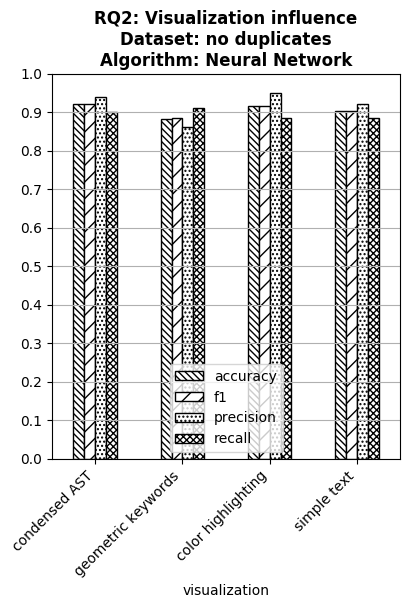

               accuracy        f1  precision    recall
visualization                                         
as             0.940454  0.944980   0.952039  0.938063
kp             0.907305  0.917166   0.894130  0.941441
sh             0.939840  0.943871   0.960407  0.927928
st             0.932474  0.938284   0.935279  0.941441


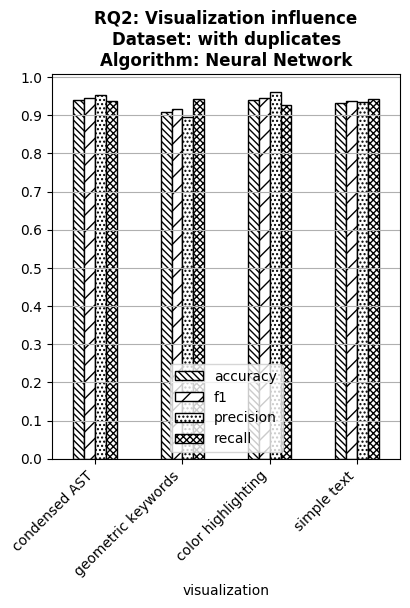

In [48]:
for dataset in exp2_results["dataset"].unique():
    ss = exp2_results[exp2_results["dataset"] == dataset]
    er1 = ss[ss.columns.difference(["dataset"])]
    g = er1.groupby(["visualization"]).mean()
    print(g)
    barplot = g.plot.bar(figsize=(4.5,5), facecolor='white', edgecolor='black')
        
    plt.title("RQ2: Visualization influence\nDataset: %s\nAlgorithm: Neural Network" % full_names(dataset), fontweight="bold")
    ax = plt.gca()
    apply_hatching(ax, g)
    ax.yaxis.grid(True)
    plt.legend(loc='lower center')
    ax.set_xticklabels(full_names(g.index), rotation=45, ha="right")
    ax.set_yticks([x*0.1 for x in range(11)])
    plt.show()

In [49]:
exp3_results = translate_names(mean_of_runs(pd.read_csv("large_multi_experiment.csv")))
exp3_results = exp3_results[(exp3_results["visualization"] == "as") & (exp3_results["algorithm"].isin(["knn", "svm", "nn"]))] 
print(exp3_results.head())
print(exp3_results.columns)
print(len(exp3_results.index))


   algorithm             dataset visualization  accuracy  precision    recall  \
0        knn    ds_no_duplicates            as  0.940678   0.973094  0.907950   
4        knn  ds_with_duplicates            as  0.926335   0.957143  0.905405   
16        nn    ds_no_duplicates            as  0.920904   0.940646  0.900976   
20        nn  ds_with_duplicates            as  0.940454   0.952039  0.938063   
32       svm    ds_no_duplicates            as  0.841102   0.812977  0.891213   

          f1  
0   0.939394  
4   0.930556  
16  0.920241  
20  0.944980  
32  0.850299  
Index(['algorithm', 'dataset', 'visualization', 'accuracy', 'precision',
       'recall', 'f1'],
      dtype='object')
6


           accuracy        f1  precision    recall
algorithm                                         
knn        0.940678  0.939394   0.973094  0.907950
nn         0.920904  0.920241   0.940646  0.900976
svm        0.841102  0.850299   0.812977  0.891213


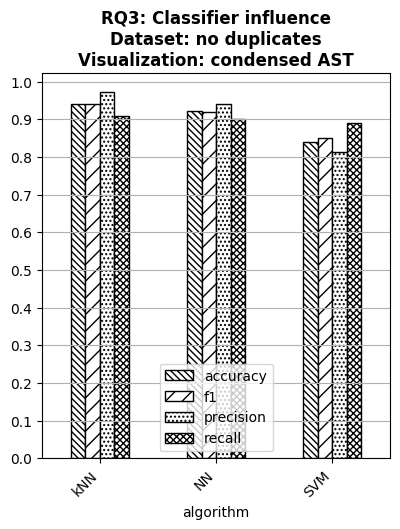

           accuracy        f1  precision    recall
algorithm                                         
knn        0.926335  0.930556   0.957143  0.905405
nn         0.940454  0.944980   0.952039  0.938063
svm        0.860037  0.877814   0.837423  0.922297


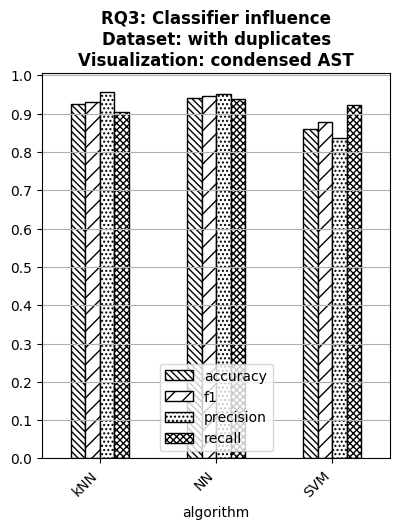

In [50]:
for dataset in exp3_results["dataset"].unique():
    ss = exp3_results[exp3_results["dataset"] == dataset]
    er1 = ss[ss.columns.difference(["dataset"])]
    g = er1.groupby(["algorithm"]).mean()
    print(g)
    barplot = g.plot.bar(figsize=(4.5,5), facecolor='white', edgecolor='black')
        
    plt.title("RQ3: Classifier influence\nDataset: %s\nVisualization: condensed AST" % full_names(dataset), fontweight="bold")
    ax = plt.gca()
    apply_hatching(ax, g)
    ax.yaxis.grid(True)
    plt.legend(loc='lower center')
    ax.set_xticklabels(full_names(g.index), rotation=45, ha="right")
    ax.set_yticks([x*0.1 for x in range(11)])
    plt.show()

In [57]:
exp4_results = translate_names(mean_of_runs(pd.read_csv("large_multi_experiment.csv")))
exp4_results = exp4_results[(exp4_results["visualization"] == "as")]# & (exp4_results["algorithm"].isin(["nn_r"]))] 
print(exp4_results.head())
print(exp4_results.columns)
print(len(exp4_results.index))


   algorithm             dataset visualization  accuracy  precision    recall  \
0        knn    ds_no_duplicates            as  0.940678   0.973094  0.907950   
4        knn  ds_with_duplicates            as  0.926335   0.957143  0.905405   
8      knn_r    ds_no_duplicates            as  0.940678   0.973094  0.907950   
12     knn_r  ds_with_duplicates            as  0.926335   0.957143  0.905405   
16        nn    ds_no_duplicates            as  0.920904   0.940646  0.900976   

          f1  
0   0.939394  
4   0.930556  
8   0.939394  
12  0.930556  
16  0.920241  
Index(['algorithm', 'dataset', 'visualization', 'accuracy', 'precision',
       'recall', 'f1'],
      dtype='object')
12


                    accuracy        f1  precision    recall
dataset                                                    
ds_no_duplicates    0.940678  0.939394   0.973094  0.907950
ds_with_duplicates  0.926335  0.930556   0.957143  0.905405


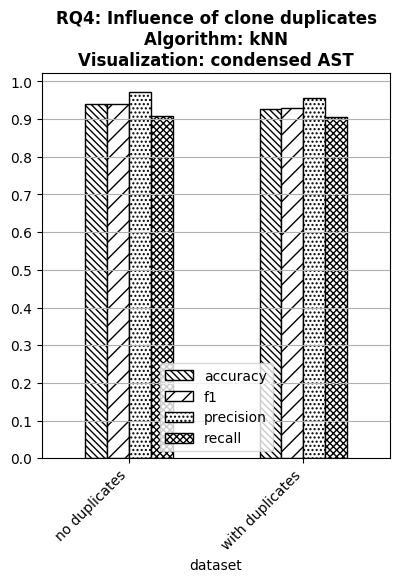

                    accuracy        f1  precision    recall
dataset                                                    
ds_no_duplicates    0.940678  0.939394   0.973094  0.907950
ds_with_duplicates  0.926335  0.930556   0.957143  0.905405


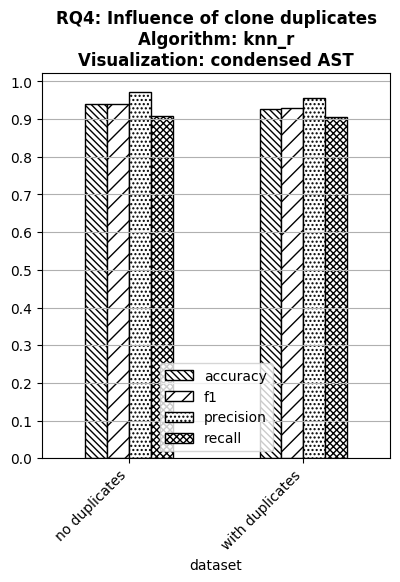

                    accuracy        f1  precision    recall
dataset                                                    
ds_no_duplicates    0.920904  0.920241   0.940646  0.900976
ds_with_duplicates  0.940454  0.944980   0.952039  0.938063


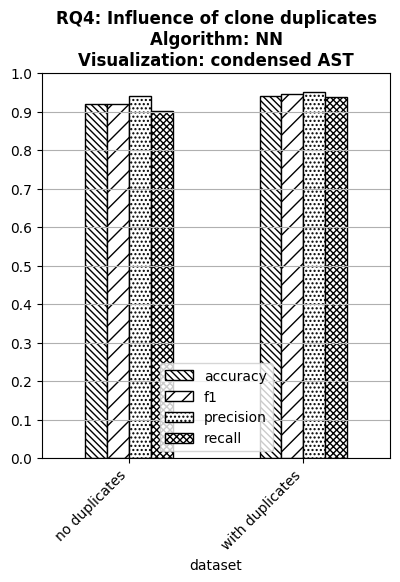

                    accuracy        f1  precision    recall
dataset                                                    
ds_no_duplicates    0.917373  0.916750   0.936661  0.898187
ds_with_duplicates  0.934316  0.939857   0.938292  0.941441


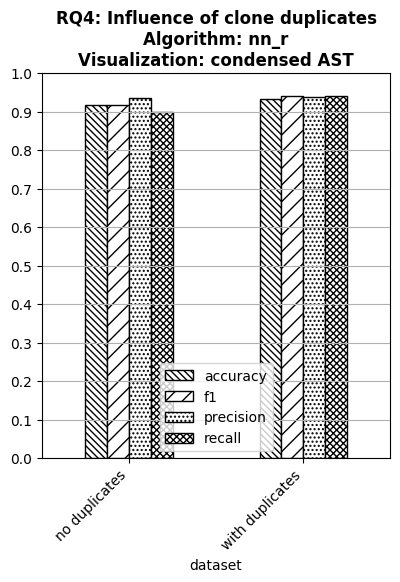

                    accuracy        f1  precision    recall
dataset                                                    
ds_no_duplicates    0.841102  0.850299   0.812977  0.891213
ds_with_duplicates  0.860037  0.877814   0.837423  0.922297


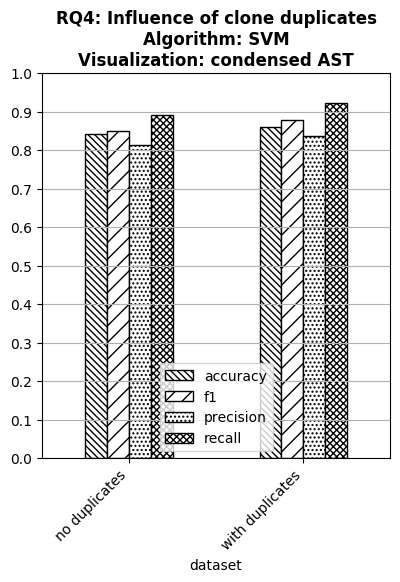

                    accuracy        f1  precision    recall
dataset                                                    
ds_no_duplicates    0.841102  0.850299   0.812977  0.891213
ds_with_duplicates  0.860037  0.877814   0.837423  0.922297


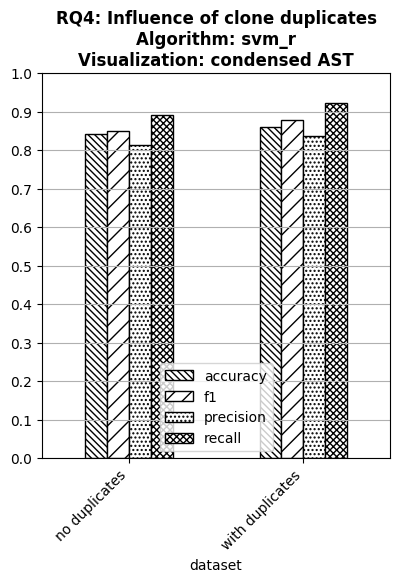

In [58]:
for algorithm in exp4_results["algorithm"].unique():
    ss = exp4_results[exp4_results["algorithm"] == algorithm]
    er1 = ss[ss.columns.difference(["algorithm"])]
    g = er1.groupby(["dataset"]).mean()
    print(g)
    barplot = g.plot.bar(figsize=(4.5,5), facecolor='white', edgecolor='black')
        
    plt.title("RQ4: Influence of clone duplicates\nAlgorithm: %s\nVisualization: condensed AST" % full_names(algorithm), fontweight="bold")
    ax = plt.gca()
    apply_hatching(ax, g)
    ax.yaxis.grid(True)
    plt.legend(loc='lower center')
    ax.set_xticklabels(full_names(g.index), rotation=45, ha="right")
    ax.set_yticks([x*0.1 for x in range(11)])
    plt.show()

In [53]:
exp5_add_results = translate_names(mean_of_runs(pd.read_csv("large_multi_experiment.csv")))
exp5_add_results = exp5_add_results[(exp5_add_results["algorithm"] == "nn" )
                                & (exp5_add_results["visualization"] == "as")]
print(exp5_add_results)

   algorithm             dataset visualization  accuracy  precision    recall  \
16        nn    ds_no_duplicates            as  0.920904   0.940646  0.900976   
20        nn  ds_with_duplicates            as  0.940454   0.952039  0.938063   

          f1  
16  0.920241  
20  0.944980  


In [59]:
exp5_results = translate_names(mean_of_runs(pd.read_csv("compar_to_astnn.csv")))
exp5_results = pd.concat([exp5_results, exp5_add_results])
exp5_results = exp5_results[(exp5_results["visualization"] == "as") | (exp5_results["visualization"] == "none")]# & (exp4_results["algorithm"].isin(["nn_r"]))] 
exp5_results = exp5_results[(exp5_results["algorithm"] == "astnn") | (exp5_results["algorithm"] == "nn")]# & (exp4_results["algorithm"].isin(["nn_r"]))] 
print(exp5_results.head())
print(exp5_results.columns)
print(len(exp5_results.index))


   algorithm             dataset visualization  accuracy  precision    recall  \
0      astnn               ASTNN          none  0.940679   0.997915  0.882906   
1      astnn    ds_no_duplicates          none  0.976695   0.981797  0.972106   
2      astnn  ds_with_duplicates          none  0.991406   0.991077  0.993243   
4         nn               ASTNN            as  0.918042   0.953626  0.942883   
16        nn    ds_no_duplicates            as  0.920904   0.940646  0.900976   

          f1  
0   0.936894  
1   0.976903  
2   0.992136  
4   0.948192  
16  0.920241  
Index(['algorithm', 'dataset', 'visualization', 'accuracy', 'precision',
       'recall', 'f1'],
      dtype='object')
6


           accuracy        f1  precision    recall
algorithm                                         
astnn      0.940679  0.936894   0.997915  0.882906
nn         0.918042  0.948192   0.953626  0.942883


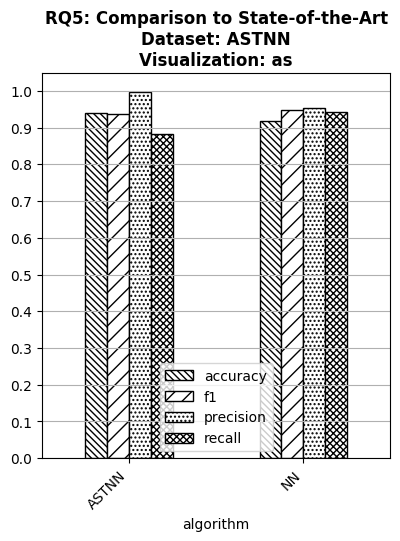

           accuracy        f1  precision    recall
algorithm                                         
astnn      0.976695  0.976903   0.981797  0.972106
nn         0.920904  0.920241   0.940646  0.900976


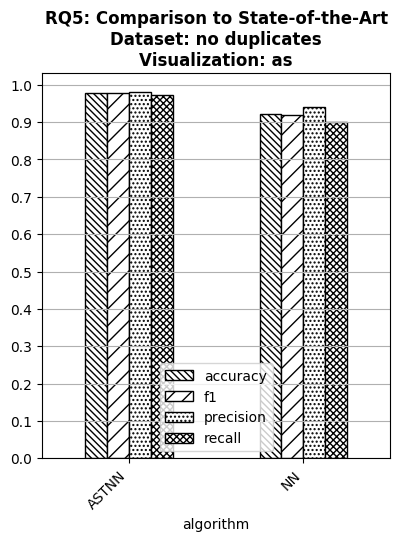

           accuracy        f1  precision    recall
algorithm                                         
astnn      0.991406  0.992136   0.991077  0.993243
nn         0.940454  0.944980   0.952039  0.938063


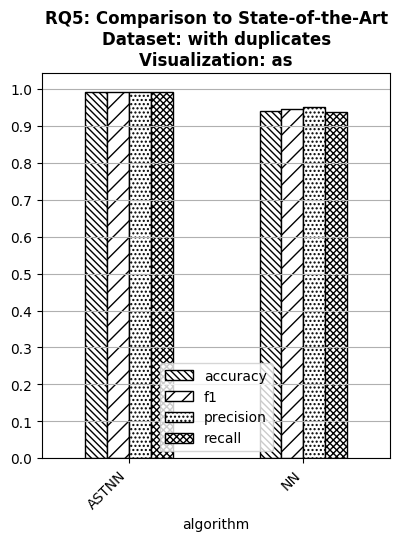

In [60]:
for dataset in exp5_results["dataset"].unique():
    ss = exp5_results[exp5_results["dataset"] == dataset]
    er1 = ss[ss.columns.difference(["dataset"])]
    g = er1.groupby(["algorithm"]).mean()
    print(g)
    barplot = g.plot.bar(figsize=(4.5,5), facecolor='white', edgecolor='black')
        
    plt.title("RQ5: Comparison to State-of-the-Art\nDataset: %s\nVisualization: %s" % (full_names(dataset), "as"), fontweight="bold")
    ax = plt.gca()
    apply_hatching(ax, g)
    ax.yaxis.grid(True)
    plt.legend(loc='lower center')
    ax.set_xticklabels(full_names(g.index), rotation=45, ha="right")
    ax.set_yticks([x*0.1 for x in range(11)])
    plt.show()